<a href="https://colab.research.google.com/github/Bhavya-31/9921103089/blob/main/Intelligent_Thermal_Management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# Generate synthetic data for temperature management
num_samples = 1000
ambient_temperature = np.random.uniform(20, 35, num_samples)  # Ambient temperature range (20-35°C)
battery_usage = np.random.randint(100, 1000, num_samples)  # Battery usage in charge cycles

# Simulate battery temperature based on ambient temperature and usage, with some noise
battery_temperature = 0.7 * ambient_temperature + 0.3 * (battery_usage / 50) + np.random.normal(0, 2, num_samples)

# Create DataFrame
data = pd.DataFrame({
    'ambient_temperature': ambient_temperature,
    'battery_usage': battery_usage,
    'battery_temperature': battery_temperature
})

# Split data into training and testing sets
X = data[['ambient_temperature', 'battery_usage']]
y = data['battery_temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")


Mean Squared Error on Test Set: 3.47


In [4]:
# Define thresholds for cooling system activation
MAX_OPTIMAL_TEMP = 40  # Max optimal temperature in Celsius
COOLING_ADJUSTMENT = 5  # Cooling system adjustment in degrees

def adjust_cooling_system(predicted_temp):
    """ Adjusts cooling mechanism based on predicted battery temperature. """
    if predicted_temp > MAX_OPTIMAL_TEMP:
        cooling_action = f"Cooling activated! Reducing temperature by {COOLING_ADJUSTMENT}°C."
        adjusted_temp = predicted_temp - COOLING_ADJUSTMENT
    else:
        cooling_action = "Cooling inactive. Temperature within safe range."
        adjusted_temp = predicted_temp
    return adjusted_temp, cooling_action

# Simulate real-time temperature predictions and cooling adjustments
def simulate_thermal_management(model, num_simulations=10):
    results = []
    for _ in range(num_simulations):
        # Simulate ambient temperature and battery usage for each cycle
        ambient_temp = np.random.uniform(20, 35)
        battery_usage = np.random.randint(100, 1000)

        # Predict battery temperature
        predicted_temp = model.predict([[ambient_temp, battery_usage]])[0]

        # Adjust cooling system based on predicted temperature
        adjusted_temp, action = adjust_cooling_system(predicted_temp)

        # Store the results
        results.append({
            'ambient_temperature': ambient_temp,
            'battery_usage': battery_usage,
            'predicted_temperature': predicted_temp,
            'adjusted_temperature': adjusted_temp,
            'cooling_action': action
        })

    return pd.DataFrame(results)

# Run the simulation
simulation_results = simulate_thermal_management(model, num_simulations=50)
print(simulation_results.head())


   ambient_temperature  battery_usage  predicted_temperature  \
0            20.492144            593              18.078623   
1            21.067374            935              20.447642   
2            24.428627            520              20.338143   
3            26.900036            466              21.709492   
4            32.163179            139              23.404314   

   adjusted_temperature                                    cooling_action  
0             18.078623  Cooling inactive. Temperature within safe range.  
1             20.447642  Cooling inactive. Temperature within safe range.  
2             20.338143  Cooling inactive. Temperature within safe range.  
3             21.709492  Cooling inactive. Temperature within safe range.  
4             23.404314  Cooling inactive. Temperature within safe range.  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n

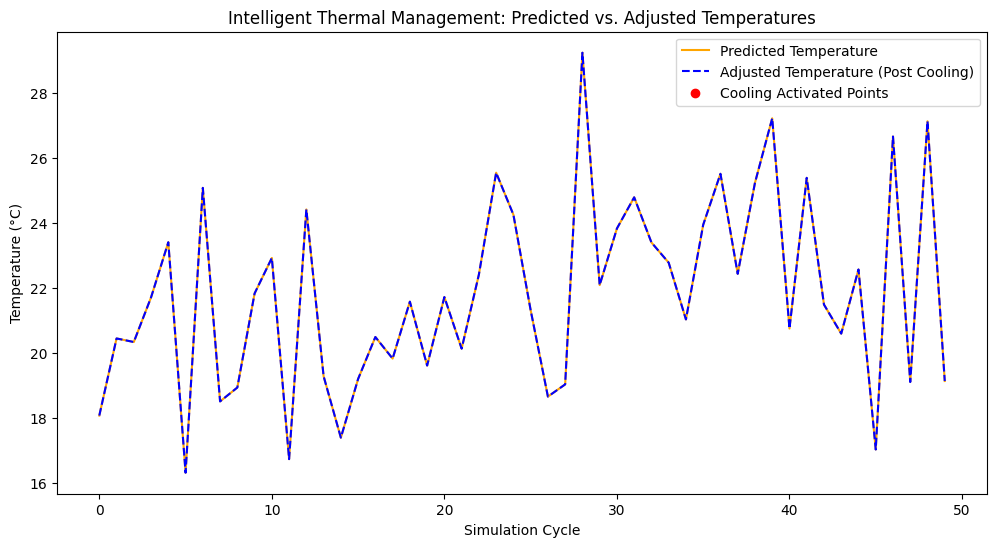

In [5]:
# Plot temperature predictions and cooling adjustments
plt.figure(figsize=(12, 6))
plt.plot(simulation_results.index, simulation_results['predicted_temperature'], label='Predicted Temperature', color='orange')
plt.plot(simulation_results.index, simulation_results['adjusted_temperature'], label='Adjusted Temperature (Post Cooling)', color='blue', linestyle='--')

# Highlight where cooling is activated
cooling_activated = simulation_results['cooling_action'].str.contains("Cooling activated")
plt.scatter(simulation_results.index[cooling_activated], simulation_results['predicted_temperature'][cooling_activated], color='red', label='Cooling Activated Points')

plt.xlabel("Simulation Cycle")
plt.ylabel("Temperature (°C)")
plt.title("Intelligent Thermal Management: Predicted vs. Adjusted Temperatures")
plt.legend()
plt.show()
